# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

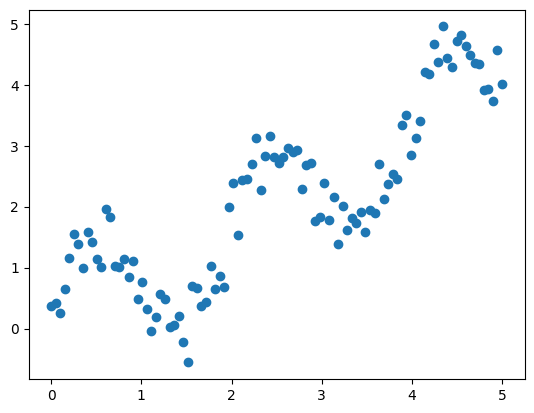

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.62113809958532


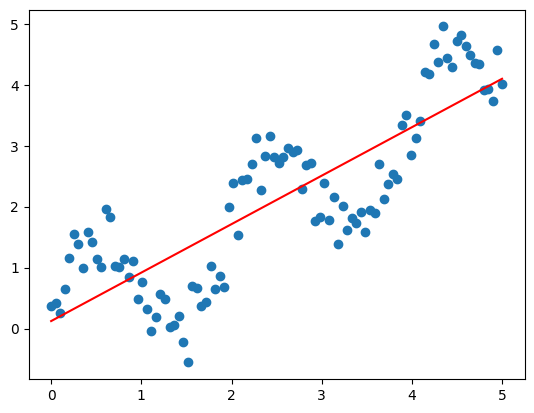

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [11]:
print(x.shape)

(100,)


In [8]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [9]:
regr_poly = LinearRegression()

In [10]:
regr_poly.fit(X_poly, y)

LinearRegression()

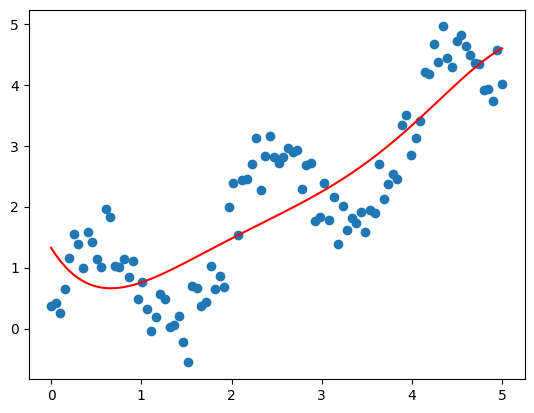

In [11]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [12]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.38463208  2.75364958 -1.14315557  0.22276516 -0.01599334]
interception:  1.32408987881593


In [13]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.32408988, 1.21053199, 1.11015842, 1.02213696, 0.9456689 ,
       0.87998844, 0.82436204, 0.77808779, 0.74049479, 0.7109425 ,
       0.68882012, 0.67354597, 0.66456684, 0.66135737, 0.66341942,
       0.67028144, 0.68149782, 0.69664829, 0.71533728, 0.73719327,
       0.76186818, 0.78903673, 0.81839583, 0.8496639 , 0.88258029,
       0.91690464, 0.95241621, 0.98891331, 1.02621262, 1.06414858,
       1.10257277, 1.14135324, 1.18037394, 1.21953402, 1.25874726,
       1.2979414 , 1.33705753, 1.37604946, 1.41488305, 1.45353566,
       1.49199542, 1.53026068, 1.56833935, 1.60624826, 1.64401252,
       1.68166495, 1.71924537, 1.75680002, 1.79438091, 1.83204521,
       1.86985457, 1.90787456, 1.94617399, 1.98482428, 2.02389885,
       2.06347248, 2.10362069, 2.14441908, 2.18594274, 2.22826557,
       2.2714597 , 2.31559484, 2.36073762, 2.40695102, 2.45429366,
       2.50281927, 2.55257595, 2.60360562, 2.65594337, 2.70961679,
       2.76464541, 2.82104   , 2.87880197, 2.93792276, 2.99838

In [14]:
regr_poly.predict(X_poly)

array([1.32408988, 1.21053199, 1.11015842, 1.02213696, 0.9456689 ,
       0.87998844, 0.82436204, 0.77808779, 0.74049479, 0.7109425 ,
       0.68882012, 0.67354597, 0.66456684, 0.66135737, 0.66341942,
       0.67028144, 0.68149782, 0.69664829, 0.71533728, 0.73719327,
       0.76186818, 0.78903673, 0.81839583, 0.8496639 , 0.88258029,
       0.91690464, 0.95241621, 0.98891331, 1.02621262, 1.06414858,
       1.10257277, 1.14135324, 1.18037394, 1.21953402, 1.25874726,
       1.2979414 , 1.33705753, 1.37604946, 1.41488305, 1.45353566,
       1.49199542, 1.53026068, 1.56833935, 1.60624826, 1.64401252,
       1.68166495, 1.71924537, 1.75680002, 1.79438091, 1.83204521,
       1.86985457, 1.90787456, 1.94617399, 1.98482428, 2.02389885,
       2.06347248, 2.10362069, 2.14441908, 2.18594274, 2.22826557,
       2.2714597 , 2.31559484, 2.36073762, 2.40695102, 2.45429366,
       2.50281927, 2.55257595, 2.60360562, 2.65594337, 2.70961679,
       2.76464541, 2.82104   , 2.87880197, 2.93792276, 2.99838

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [15]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [16]:
sigma = 0.3

In [17]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [18]:
regr_rbf = LinearRegression()

In [19]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

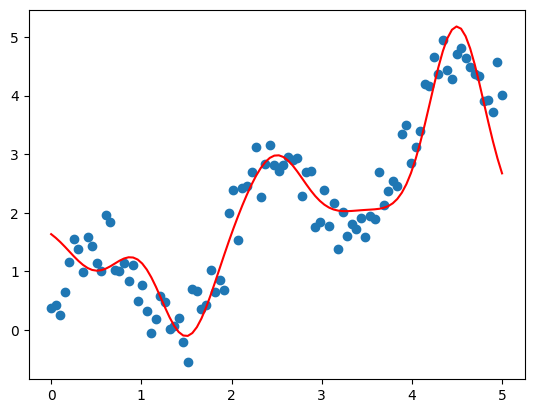

In [20]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [21]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.82101945 -1.94734867  1.14957176  0.19279559  3.34059476]
interception:  1.840340745725801


#### Comparison

In [22]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

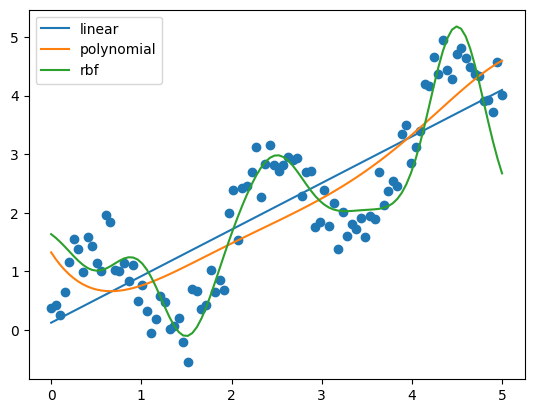

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.62113809958532


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5154908830498006


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2538042779448462
